In [44]:
import numpy as np
import matplotlib.pyplot as plt



In [45]:
from tensorflow.keras.datasets import cifar10

(all_train_images, all_train_labels), (test_images, test_labels) = cifar10.load_data()

In [46]:
from sklearn.model_selection import train_test_split
train_images, validation_images, train_labels, validation_labels = train_test_split(all_train_images,all_train_labels,test_size=0.2,shuffle=True)

In [47]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

In [48]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [49]:
from keras import models
from keras import layers
import tensorflow as tf
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# conv_base.trainable = False

In [50]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False



In [51]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

In [52]:
print(train_images.shape , train_labels.shape)
print(validation_images.shape , validation_labels.shape)
print(test_images.shape , test_labels.shape)

(40000, 32, 32, 3) (40000, 10)
(10000, 32, 32, 3) (10000, 10)
(10000, 32, 32, 3) (10000, 10)


In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 7,213,322
Non-trainable params: 7,635,264
_________________________________________________________________


In [54]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras import optimizers

train_datagen = ImageDataGenerator(
      #rescale=1./255,
      preprocessing_function=preprocess_input,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)#rescale=1./255) # Issue: https://github.com/fchollet/deep-learning-with-python-notebooks/issues/21

train_generator = train_datagen.flow(
        train_images,
        train_labels,
        batch_size=400)

validation_generator = test_datagen.flow(
        validation_images,
        validation_labels,
        batch_size=100)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['categorical_accuracy'])


history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=100,
      verbose=2)

Epoch 1/20
100/100 - 24s - loss: 1.9634 - categorical_accuracy: 0.3713 - val_loss: 1.2783 - val_categorical_accuracy: 0.5706 - 24s/epoch - 240ms/step
Epoch 2/20
100/100 - 23s - loss: 1.2774 - categorical_accuracy: 0.5663 - val_loss: 0.9870 - val_categorical_accuracy: 0.6723 - 23s/epoch - 225ms/step
Epoch 3/20
100/100 - 23s - loss: 1.1187 - categorical_accuracy: 0.6187 - val_loss: 1.0531 - val_categorical_accuracy: 0.6654 - 23s/epoch - 226ms/step
Epoch 4/20
100/100 - 24s - loss: 1.0399 - categorical_accuracy: 0.6470 - val_loss: 0.8534 - val_categorical_accuracy: 0.7201 - 24s/epoch - 241ms/step
Epoch 5/20
100/100 - 24s - loss: 0.9880 - categorical_accuracy: 0.6602 - val_loss: 0.9881 - val_categorical_accuracy: 0.6754 - 24s/epoch - 237ms/step
Epoch 6/20
100/100 - 22s - loss: 0.9431 - categorical_accuracy: 0.6752 - val_loss: 0.8785 - val_categorical_accuracy: 0.7076 - 22s/epoch - 224ms/step
Epoch 7/20
100/100 - 23s - loss: 0.9054 - categorical_accuracy: 0.6892 - val_loss: 0.7681 - val_cate

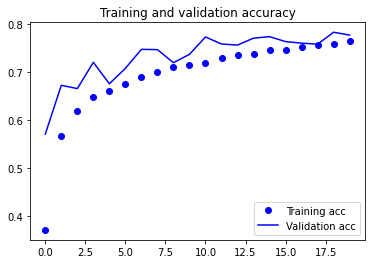

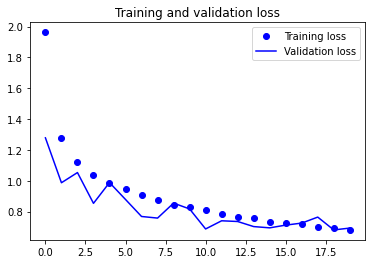

In [55]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [56]:
test_generator = test_datagen.flow(
        test_images,
        test_labels,
        batch_size=100)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=100)
print('test acc:', test_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


test acc: 0.7670999765396118


In [57]:
model.save("/content/sample_data/Model_TF_AUG")

INFO:tensorflow:Assets written to: /content/sample_data/Model_TF_AUG/assets
